In [19]:
#import all necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score 
from sklearn.cluster import DBSCAN

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


#### load the data set

In [20]:
df = pd.read_csv('car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [21]:
df.tail()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [22]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [24]:
df.shape

(50000, 7)

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine size,50000.0,1.773058,0.734108,1.0,1.40,1.6,2.0,5.0
Year of manufacture,50000.0,2004.209440,9.645965,1984.0,1996.00,2004.0,2012.0,2022.0
Mileage,50000.0,112497.320700,71632.515602,630.0,54352.25,100987.5,158601.0,453537.0
Price,50000.0,13828.903160,16416.681336,76.0,3060.75,7971.5,19026.5,168081.0


#### Data Visualisation

<Axes: xlabel='Price', ylabel='Count'>

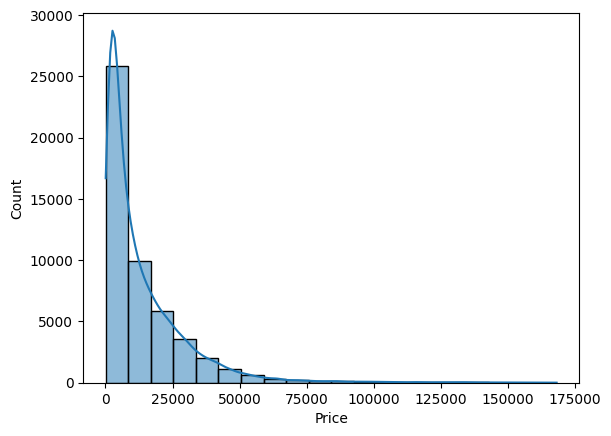

In [26]:
sns.histplot(df['Price'], bins=20, kde=True)

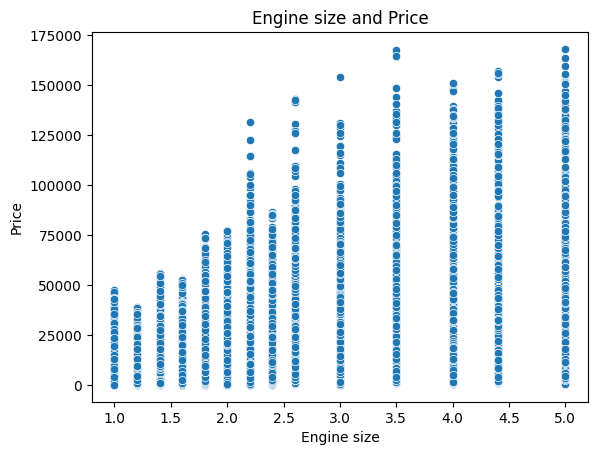

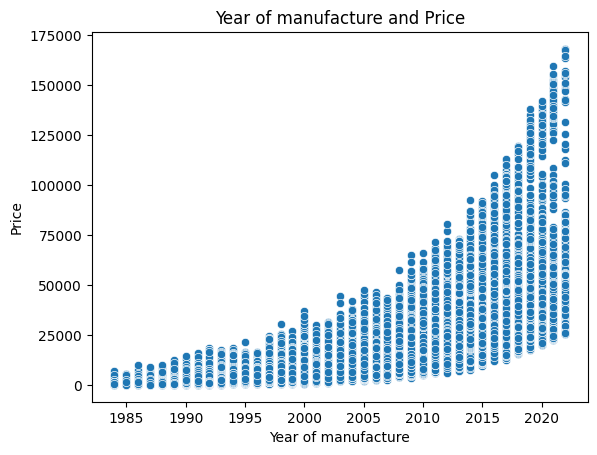

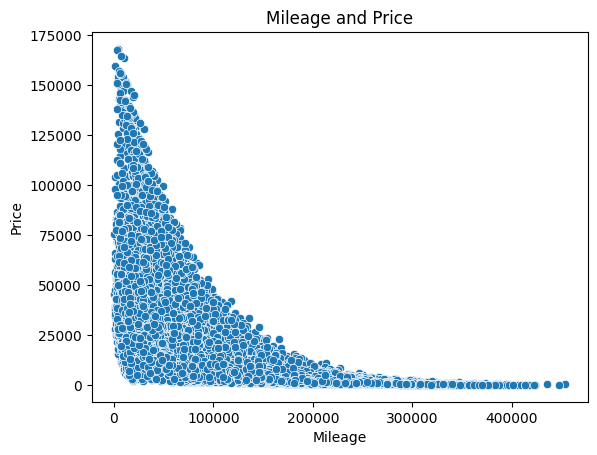

In [27]:
num_features = ['Engine size', 'Year of manufacture', 'Mileage']
for feature in num_features:
    sns.scatterplot(data = df, x = feature, y = 'Price')
    plt.title(f'{feature} and Price')
    plt.show()

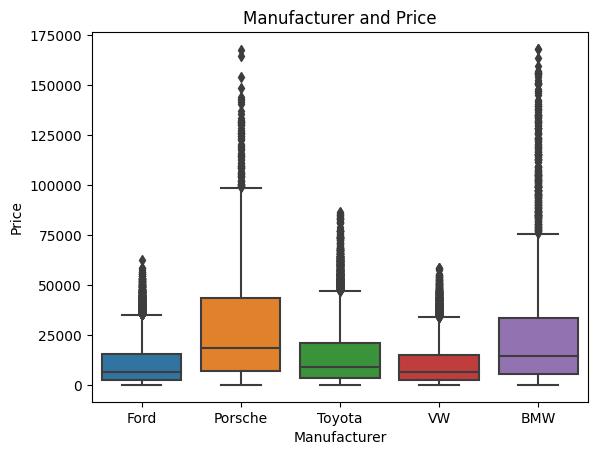

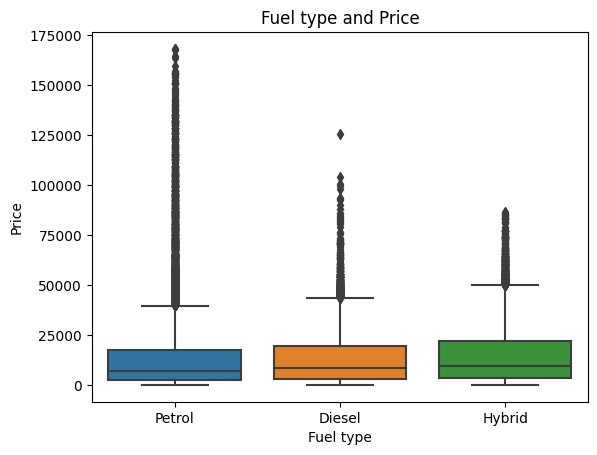

In [28]:
cat_features = ['Manufacturer', 'Fuel type']
for feature in cat_features:
    sns.boxplot(data = df, x = feature, y = 'Price',)
    plt.title(f'{feature} and Price')
    plt.show()

#### Correlation Coefficient

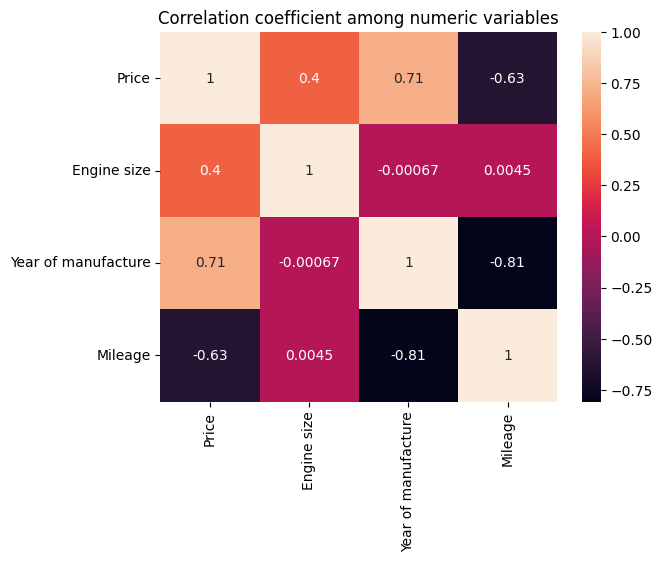

In [29]:
column_list = ['Price', 'Engine size', 'Year of manufacture', 'Mileage']
sns.heatmap(df[column_list].corr(), annot=True)
plt.title('Correlation coefficient among numeric variables')
plt.show()

In [30]:
def linear_regression_model(dpnt_var):
    metrics = {}
    metrics['name'] = dpnt_var

    print(f'************* {dpnt_var} ***************\n\n')
    
    x = df[dpnt_var]
    y = df['Price']

    print(f'x = \n{x}\n')
    print(f'y = \n{y}\n')
    x = x.to_numpy().reshape(-1, 1)
    print(f'x_reshaped = \n{x}\n')
    print(f'shape of x = {x.shape}\n')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    scale = StandardScaler()
    scale.fit(x_train)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    price_linear = LinearRegression()
    price_linear.fit(x_train_scaled, y_train)
    intercept = price_linear.intercept_
    gradient = price_linear.coef_[0]
    print(f'linear intercept for {dpnt_var} = {intercept}')
    print(f'linear gradient for {dpnt_var} = {gradient}')

    #Model Evaluation
    price_pred = price_linear.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, price_pred)
    mse = mean_squared_error(y_test, price_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, price_pred)

    metrics['mae'] = f'The linear mean absolute error for {dpnt_var} = {mae:.2f}'
    metrics['mse'] = f'The linear mean square error for {dpnt_var} = {mse:.2f}'
    metrics['rmse'] = f'The linear root mean square error for {dpnt_var} = {rmse:.2f}'
    metrics['R2'] = f'The linear coefficient of determination for {dpnt_var} = {R2:.2f}'

    #Fit the regression line (line of best fit)
    interval = 1
    if dpnt_var == 'Engine size':
        interval = 0.5
    
    x_fit = np.arange((x.min()), (x.max() + 1), interval).reshape(-1, 1)
    x_fit_scaled = scale.transform(x_fit)
    y_fit = price_linear.predict(x_fit_scaled)
    sns.scatterplot(data = df, x = dpnt_var, y = 'Price')
    plt.title(f'Linear plot of {dpnt_var} and Price')
    plt.plot(x_fit, y_fit)
    plt.xlabel(dpnt_var)
    plt.ylabel('Price (GBP)')
    plt.show()

    return(metrics)

In [31]:
def print_metrics(metric_obj):
    for key, value in metric_obj.items():
        print(value)
        if key == 'name':
            print('\n')
    print('\n')

************* Engine size ***************


x = 
0        1.0
1        4.0
2        1.6
3        1.8
4        1.0
        ... 
49995    5.0
49996    1.8
49997    1.6
49998    1.0
49999    1.4
Name: Engine size, Length: 50000, dtype: float64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[1. ]
 [4. ]
 [1.6]
 ...
 [1.6]
 [1. ]
 [1.4]]

shape of x = (50000, 1)

linear intercept for Engine size = 13854.6287
linear gradient for Engine size = 6575.659995991372


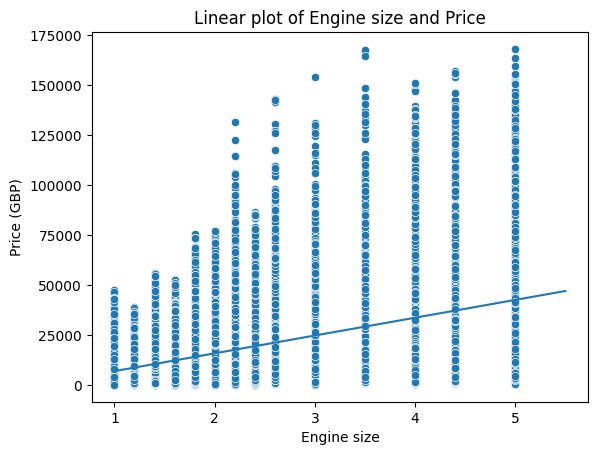

Engine size


The linear mean absolute error for Engine size = 10817.49
The linear mean square error for Engine size = 230499154.45
The linear root mean square error for Engine size = 15182.20
The linear coefficient of determination for Engine size = 0.15


************* Year of manufacture ***************


x = 
0        2002
1        2016
2        2014
3        1988
4        2006
         ... 
49995    2018
49996    2003
49997    2022
49998    2016
49999    2012
Name: Year of manufacture, Length: 50000, dtype: int64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[2002]
 [2016]
 [2014]
 ...
 [2022]
 [2016]
 [2012]]

shape of x = (50000, 1)

linear intercept for Year of manufacture = 13854.628699999997
linear gradient for Year of manufacture = 11711.62203633313


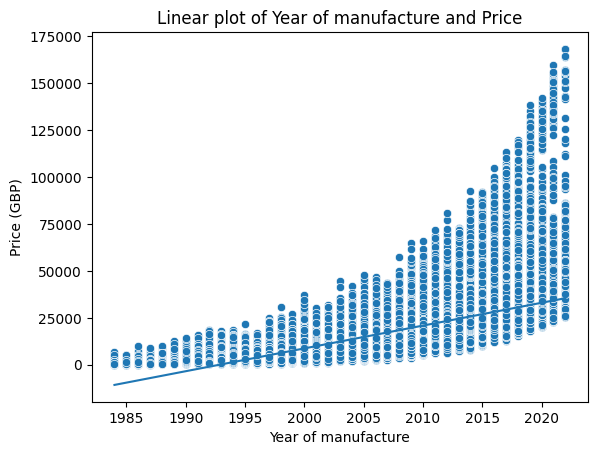

Year of manufacture


The linear mean absolute error for Year of manufacture = 7031.04
The linear mean square error for Year of manufacture = 132678999.95
The linear root mean square error for Year of manufacture = 11518.64
The linear coefficient of determination for Year of manufacture = 0.51


************* Mileage ***************


x = 
0        127300
1         57850
2         39190
3        210814
4        127869
          ...  
49995     28664
49996    105120
49997      4030
49998     26468
49999    109300
Name: Mileage, Length: 50000, dtype: int64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[127300]
 [ 57850]
 [ 39190]
 ...
 [  4030]
 [ 26468]
 [109300]]

shape of x = (50000, 1)

linear intercept for Mileage = 13854.6287
linear gradient for Mileage = -10374.075445707327


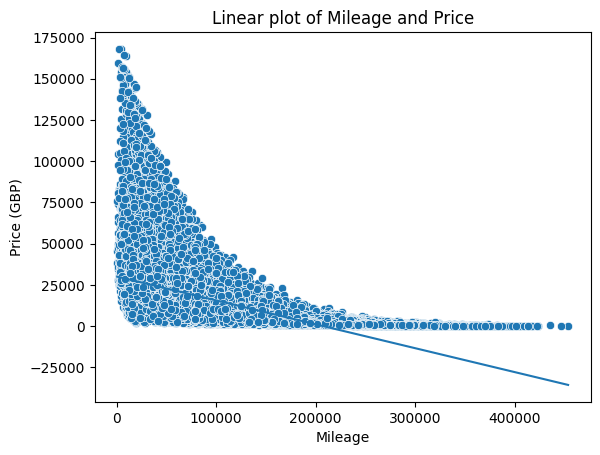

Mileage


The linear mean absolute error for Mileage = 7964.78
The linear mean square error for Mileage = 162468566.87
The linear root mean square error for Mileage = 12746.32
The linear coefficient of determination for Mileage = 0.40




In [32]:
linear_metrics_lists = []
for feature in num_features:
    params_and_evaluation_metrics = linear_regression_model(feature)
    print_metrics(params_and_evaluation_metrics)
    linear_metrics_lists.append(params_and_evaluation_metrics)

In [33]:
for metric in linear_metrics_lists:
    print_metrics(metric)

Engine size


The linear mean absolute error for Engine size = 10817.49
The linear mean square error for Engine size = 230499154.45
The linear root mean square error for Engine size = 15182.20
The linear coefficient of determination for Engine size = 0.15


Year of manufacture


The linear mean absolute error for Year of manufacture = 7031.04
The linear mean square error for Year of manufacture = 132678999.95
The linear root mean square error for Year of manufacture = 11518.64
The linear coefficient of determination for Year of manufacture = 0.51


Mileage


The linear mean absolute error for Mileage = 7964.78
The linear mean square error for Mileage = 162468566.87
The linear root mean square error for Mileage = 12746.32
The linear coefficient of determination for Mileage = 0.40




#### Non-linear regression(Polynomial Regression)

In [34]:
def polynomial_regression_model(dpnt_var):
    metrics = {}
    metrics['name'] = dpnt_var

    print(f'************* {dpnt_var} ***************\n\n')
    
    x = df[dpnt_var]
    y = df['Price']

    print(f'x = \n{x}\n')
    print(f'y = \n{y}\n')
    x = x.to_numpy().reshape(-1, 1)
    print(f'x_reshaped = \n{x}\n')
    print(f'shape of x = {x.shape}\n')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    scale = StandardScaler()
    scale.fit(x_train)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    poly = PolynomialFeatures(degree = 2, include_bias = False)
    x_poly = poly.fit_transform(x_train_scaled)
    price_poly = LinearRegression()
    price_poly.fit(x_poly, y_train)
    coefficients = price_poly.coef_
    intercept = price_poly.intercept_
    print(f'The polynomial coefficients for {dpnt_var} = {coefficients}')
    print(f'The polynomial intercept for {dpnt_var} = {intercept}')

    #Model Evaluation
    x_test_poly = poly.fit_transform(x_test_scaled)
    price_pred = price_poly.predict(x_test_poly)

    mae = mean_absolute_error(y_test, price_pred)
    mse = mean_squared_error(y_test, price_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, price_pred)

    metrics['mae'] = f'The polynomial mean absolute error for {dpnt_var} = {mae:.2f}'
    metrics['mse'] = f'The polynomial mean square error for {dpnt_var} = {mse:.2f}'
    metrics['rmse'] = f'The polynomial root mean square error for {dpnt_var} = {rmse:.2f}'
    metrics['R2'] = f'The polynomial coefficient of determination for {dpnt_var} = {R2:.2f}'

    #Fit the regression line (line of best fit)
    interval = 1
    if dpnt_var == 'Engine size':
        interval = 0.5
    
    x_fit = np.arange((x.min()), (x.max() + 1), interval).reshape(-1, 1)
    x_fit_scaled = scale.transform(x_fit)
    x_fit_poly = poly.fit_transform(x_fit_scaled)
    y_fit = price_poly.predict(x_fit_poly)
    sns.scatterplot(data = df, x = dpnt_var, y = 'Price')
    plt.title(f'Polynomial plot of {dpnt_var} and Price')
    plt.plot(x_fit, y_fit)
    plt.xlabel(dpnt_var)
    plt.ylabel('Price (GBP)')
    plt.show()

    return(metrics)

************* Engine size ***************


x = 
0        1.0
1        4.0
2        1.6
3        1.8
4        1.0
        ... 
49995    5.0
49996    1.8
49997    1.6
49998    1.0
49999    1.4
Name: Engine size, Length: 50000, dtype: float64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[1. ]
 [4. ]
 [1.6]
 ...
 [1.6]
 [1. ]
 [1.4]]

shape of x = (50000, 1)

The polynomial coefficients for Engine size = [6079.69940101  238.69551851]
The polynomial intercept for Engine size = 13615.933181493827


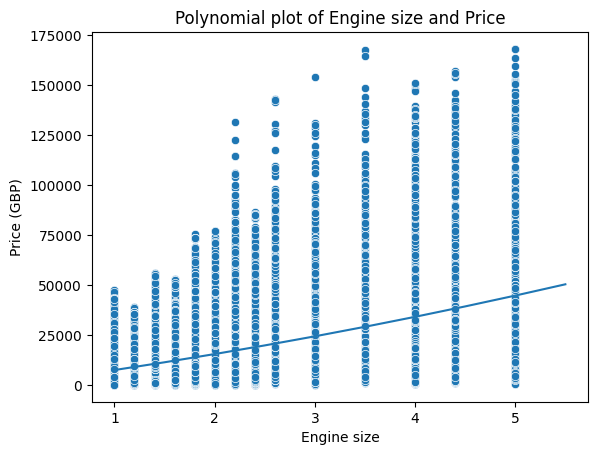

Engine size


The polynomial mean absolute error for Engine size = 10807.26
The polynomial mean square error for Engine size = 230326166.00
The polynomial root mean square error for Engine size = 15176.50
The polynomial coefficient of determination for Engine size = 0.15


************* Year of manufacture ***************


x = 
0        2002
1        2016
2        2014
3        1988
4        2006
         ... 
49995    2018
49996    2003
49997    2022
49998    2016
49999    2012
Name: Year of manufacture, Length: 50000, dtype: int64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[2002]
 [2016]
 [2014]
 ...
 [2022]
 [2016]
 [2012]]

shape of x = (50000, 1)

The polynomial coefficients for Year of manufacture = [12065.80671724  5281.89564916]
The polynomial intercept for Year of manufacture = 8572.

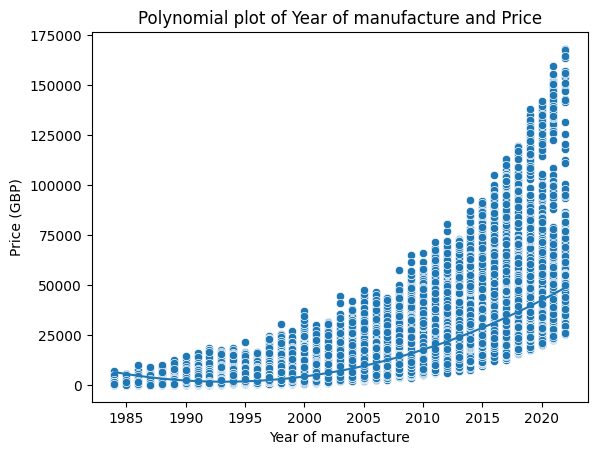

Year of manufacture


The polynomial mean absolute error for Year of manufacture = 5387.11
The polynomial mean square error for Year of manufacture = 105993894.20
The polynomial root mean square error for Year of manufacture = 10295.33
The polynomial coefficient of determination for Year of manufacture = 0.61


************* Mileage ***************


x = 
0        127300
1         57850
2         39190
3        210814
4        127869
          ...  
49995     28664
49996    105120
49997      4030
49998     26468
49999    109300
Name: Mileage, Length: 50000, dtype: int64

y = 
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64

x_reshaped = 
[[127300]
 [ 57850]
 [ 39190]
 ...
 [  4030]
 [ 26468]
 [109300]]

shape of x = (50000, 1)

The polynomial coefficients for Mileage = [-13630.81884183   4476.1506104 ]
The polynomial in

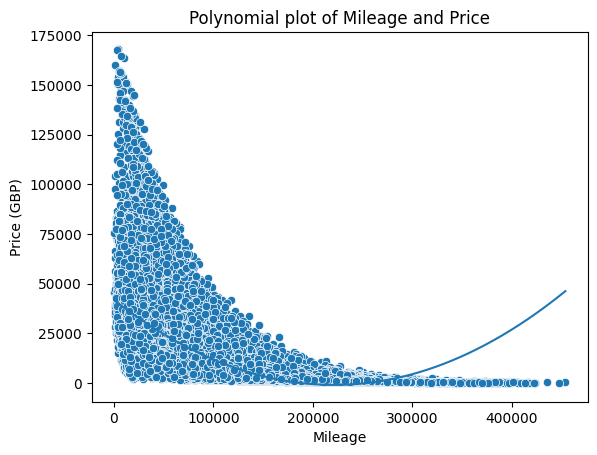

Mileage


The polynomial mean absolute error for Mileage = 6409.91
The polynomial mean square error for Mileage = 129620312.16
The polynomial root mean square error for Mileage = 11385.09
The polynomial coefficient of determination for Mileage = 0.52




In [35]:
polynomial_metrics_lists = []
for feature in num_features:
    params_and_evaluation_metrics = polynomial_regression_model(feature)
    print_metrics(params_and_evaluation_metrics)
    polynomial_metrics_lists.append(params_and_evaluation_metrics)

In [36]:
for metric in polynomial_metrics_lists:
    print_metrics(metric)

Engine size


The polynomial mean absolute error for Engine size = 10807.26
The polynomial mean square error for Engine size = 230326166.00
The polynomial root mean square error for Engine size = 15176.50
The polynomial coefficient of determination for Engine size = 0.15


Year of manufacture


The polynomial mean absolute error for Year of manufacture = 5387.11
The polynomial mean square error for Year of manufacture = 105993894.20
The polynomial root mean square error for Year of manufacture = 10295.33
The polynomial coefficient of determination for Year of manufacture = 0.61


Mileage


The polynomial mean absolute error for Mileage = 6409.91
The polynomial mean square error for Mileage = 129620312.16
The polynomial root mean square error for Mileage = 11385.09
The polynomial coefficient of determination for Mileage = 0.52




#### Multiple linear regression

In [37]:
def multiple_regression(features):
    x = df[features]
    y = df['Price']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    scale = StandardScaler()

    scale.fit(x_train)

    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    price_linear = LinearRegression()

    price_linear.fit(x_train_scaled, y_train)

    intercept = price_linear.intercept_
    coefficients = price_linear.coef_

    print("coefficients: ", coefficients)
    print("intercept: ", intercept)

    price_pred = price_linear.predict(x_test_scaled)
    mean_abs = mean_absolute_error(y_test, price_pred)
    mean_squared = mean_squared_error(y_test, price_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, price_pred)
    print(f"Mean absolute error : {mean_abs:.2f}")
    print(f"Mean squared error : {mean_squared:.2f}")
    print(f"Root mean squared error : {rms_error:.2f}")
    print(f"R2 : {R2:.2f}")

In [38]:
feature_combinations = [
    ['Engine size', 'Year of manufacture'],
    ['Engine size', 'Mileage'],
    ['Year of manufacture', 'Mileage'],
    num_features
]

for combo in feature_combinations:
    print(f'\n****** {combo} *******\n')
    multiple_regression(combo)


****** ['Engine size', 'Year of manufacture'] *******

coefficients:  [ 6583.22192564 11715.87113232]
intercept:  13854.628699999997
Mean absolute error : 6226.03
Mean squared error : 91667069.80
Root mean squared error : 9574.29
R2 : 0.66

****** ['Engine size', 'Mileage'] *******

coefficients:  [  6622.39198355 -10403.8219697 ]
intercept:  13854.6287
Mean absolute error : 7161.55
Mean squared error : 120988641.74
Root mean squared error : 10999.48
R2 : 0.55

****** ['Year of manufacture', 'Mileage'] *******

coefficients:  [ 9576.75989294 -2645.32605814]
intercept:  13854.628699999997
Mean absolute error : 6916.36
Mean squared error : 130297897.84
Root mean squared error : 11414.81
R2 : 0.52

****** ['Engine size', 'Year of manufacture', 'Mileage'] *******

coefficients:  [ 6594.02448017  9520.41488938 -2720.41736808]
intercept:  13854.628699999997
Mean absolute error : 6091.46
Mean squared error : 89158615.76
Root mean squared error : 9442.38
R2 : 0.67


#### Random Forest Regression

In [39]:
numeric_feature_names = ['Engine size', 'Year of manufacture', 'Mileage']
x_numerical = df[numeric_feature_names]

scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

label = LabelEncoder()

x_cat = df[['Manufacturer', 'Fuel type']]

for c in x_cat.columns:
    x_cat[c] = label.fit_transform(x_cat[c])    

x = np.concatenate((x_numerical_scaled, x_cat), axis = 1)

y = df['Price']

In [40]:
x

array([[0.        , 0.47368421, 0.27968214, 1.        , 2.        ],
       [0.75      , 0.84210526, 0.1263394 , 2.        , 2.        ],
       [0.15      , 0.78947368, 0.08513889, 1.        , 0.        ],
       ...,
       [0.15      , 1.        , 0.00750706, 1.        , 0.        ],
       [0.        , 0.84210526, 0.05704924, 1.        , 0.        ],
       [0.1       , 0.73684211, 0.23993888, 4.        , 0.        ]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scale = StandardScaler()
scale.fit(x_train)

StandardScaler()

In [42]:
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

price_linear = RandomForestRegressor()
price_linear.fit(x_train_scaled, y_train)

price_pred = price_linear.predict(x_test_scaled)

In [43]:
mean_abs = mean_absolute_error(y_test, price_pred)
mean_squared = mean_squared_error(y_test, price_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, price_pred)

print(f"The random forest Mean absolute error =  {mean_abs}")
print(f"The random forest Mean squared error = {mean_squared}")
print(f"The random forest Root mean squared error = {rms_error}")
print(f"The random forest R2 = {R2}")

The random forest Mean absolute error =  1058.3870694666666
The random forest Mean squared error = 5490155.282592632
The random forest Root mean squared error = 2343.108039035467
The random forest R2 = 0.9797691352708175


In [44]:
print('Max price : ',df['Price'].max())
print('Min price : ',df['Price'].min())

Max price :  168081
Min price :  76


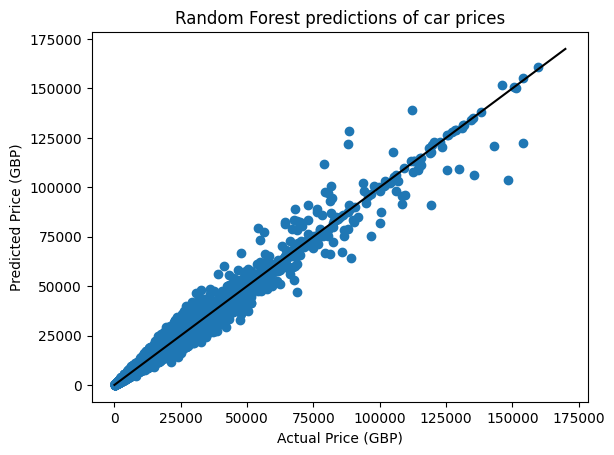

In [45]:
plt.scatter(y_test, price_pred)

plt.plot([0, 170000], [0, 170000], 'k-')
plt.title('Random Forest predictions of car prices')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')
plt.show()

#### Artificial Neural Network (ANN)

In [46]:
numeric_feature_names = ['Engine size', 'Year of manufacture', 'Mileage']
x_numerical = df[numeric_feature_names]

scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

# encode non-numerical features
label = LabelEncoder()

x_cat = df[['Manufacturer', 'Fuel type']]

for c in x_cat.columns:
    x_cat[c] = label.fit_transform(x_cat[c])    

x = np.concatenate((x_numerical_scaled, x_cat), axis = 1)

y = df['Price']

print(x)
print(y)

[[0.         0.47368421 0.27968214 1.         2.        ]
 [0.75       0.84210526 0.1263394  2.         2.        ]
 [0.15       0.78947368 0.08513889 1.         0.        ]
 ...
 [0.15       1.         0.00750706 1.         0.        ]
 [0.         0.84210526 0.05704924 1.         0.        ]
 [0.1        0.73684211 0.23993888 4.         0.        ]]
0          3074
1         49704
2         24072
3          1705
4          4101
          ...  
49995    113006
49996      9430
49997     49852
49998     23630
49999     10400
Name: Price, Length: 50000, dtype: int64


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
# Artificial neural network model
def ann_model(layers, learning_rate, drop_out):
    
    rate = 'default' if learning_rate == 'adam' else learning_rate.get_config()['learning_rate']
   
    evaluation_metrics = {}
    evaluation_metrics['name'] = f'*** Hyper-parameters: Hidden layers : {layers}, Learning rate : {rate}, Drop out : {drop_out} ***'
    
    model = Sequential()

    model.add(Dense(units = 64, input_dim = (5), activation = "relu"))
    model.add(Dropout(drop_out))

    for layer in range(1, layers):
        model.add(Dense(units = 64, activation = "relu"))

    model.add(Dense(units = 1, activation = "linear"))

    model.summary()
    model.compile(optimizer=learning_rate, loss='mean_squared_error', metrics='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
    history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 300, verbose = 2, validation_split = 0.1, callbacks = [early_stopping])
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_metrics['mse'] = f'Mean squared_error = {mse}'
    evaluation_metrics['mae'] = f'Mean absolute_error = {mae}'
    evaluation_metrics['r2'] = f'R2 score = {r2}'
    return ([y_pred, history, evaluation_metrics])

In [49]:
#graph plotter
def plot_graphs(y_predict, history):

    plt.scatter(y_test, y_pred)

    plt.plot([0, 170000], [0, 170000], 'k-')

    plt.xlabel("Actual Price (GBP)")
    plt.ylabel("Predicted Price (GBP)")

    plt.show()

    history_df = pd.DataFrame(history.history)

    plt.plot(history_df["loss"], label = "Training")
    plt.plot(history_df["val_loss"], label = "Validation")

    plt.legend()

    plt.xlabel("Epoch")
    plt.ylabel("Loss = Mean Squared Error")

    plt.show()

#### ANN with two hidden layers, default adam optimizer and 20% drop out

In [32]:
ann_metrics = []

hidden_layers = 2
adam_optimizer_learning_rate = 'adam'
drop_out_rate = 0.2
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1125/1125 - 3s - loss: 329203424.0000 - mean_squared_error: 329203424.0000 - val_loss: 236814928.0000 - val_mean_squared_error: 236814928.0000 - 3s/epoch - 2ms/step
Epoch 2/3

Epoch 43/300
1125/1125 - 1s - loss: 21875480.0000 - mean_squared_error: 21875480.0000 - val_loss: 18935826.0000 - val_mean_squared_error: 18935826.0000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 22179668.0000 - mean_squared_error: 22179668.0000 - val_loss: 18939524.0000 - val_mean_squared_error: 18939524.0000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 21956112.0000 - mean_squared_error: 21956112.0000 - val_loss: 18985580.0000 - val_mean_squared_error: 18985580.0000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 22048662.0000 - mean_squared_error: 22048662.0000 - val_loss: 18819352.0000 - val_mean_squared_error: 18819352.0000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 21718016.0000 - mean_squared_error: 21718016.0000 - val_loss: 18723062.0000 - val_mean_squared_error: 18723062.0000 - 1s/epoch - 1ms/step
Epoch 48/300
1125/1125 - 1s - loss: 21842004.0000 - mean_squared_error: 21842004.0000 - val_loss: 18808684.0000 - val_mean_squared

Epoch 91/300
1125/1125 - 1s - loss: 21060460.0000 - mean_squared_error: 21060460.0000 - val_loss: 18048418.0000 - val_mean_squared_error: 18048418.0000 - 1s/epoch - 1ms/step
Epoch 92/300
1125/1125 - 1s - loss: 21750074.0000 - mean_squared_error: 21750074.0000 - val_loss: 18148154.0000 - val_mean_squared_error: 18148154.0000 - 1s/epoch - 1ms/step
Epoch 93/300
1125/1125 - 1s - loss: 21114462.0000 - mean_squared_error: 21114462.0000 - val_loss: 18077782.0000 - val_mean_squared_error: 18077782.0000 - 1s/epoch - 1ms/step
Epoch 94/300
1125/1125 - 1s - loss: 21318636.0000 - mean_squared_error: 21318636.0000 - val_loss: 18236212.0000 - val_mean_squared_error: 18236212.0000 - 1s/epoch - 1ms/step
Epoch 95/300
1125/1125 - 1s - loss: 21301744.0000 - mean_squared_error: 21301744.0000 - val_loss: 18332270.0000 - val_mean_squared_error: 18332270.0000 - 1s/epoch - 1ms/step
Epoch 96/300
1125/1125 - 1s - loss: 21075756.0000 - mean_squared_error: 21075756.0000 - val_loss: 18140794.0000 - val_mean_squared

Epoch 138/300
1125/1125 - 1s - loss: 20675152.0000 - mean_squared_error: 20675152.0000 - val_loss: 18188708.0000 - val_mean_squared_error: 18188708.0000 - 1s/epoch - 1ms/step
Epoch 139/300
1125/1125 - 1s - loss: 20854246.0000 - mean_squared_error: 20854246.0000 - val_loss: 17795094.0000 - val_mean_squared_error: 17795094.0000 - 1s/epoch - 1ms/step
Epoch 140/300
1125/1125 - 1s - loss: 21090464.0000 - mean_squared_error: 21090464.0000 - val_loss: 17788072.0000 - val_mean_squared_error: 17788072.0000 - 1s/epoch - 1ms/step
Epoch 141/300
1125/1125 - 1s - loss: 21075248.0000 - mean_squared_error: 21075248.0000 - val_loss: 17849692.0000 - val_mean_squared_error: 17849692.0000 - 1s/epoch - 1ms/step
Epoch 142/300
1125/1125 - 1s - loss: 20704244.0000 - mean_squared_error: 20704244.0000 - val_loss: 17775956.0000 - val_mean_squared_error: 17775956.0000 - 1s/epoch - 1ms/step
Epoch 143/300
1125/1125 - 1s - loss: 20483316.0000 - mean_squared_error: 20483316.0000 - val_loss: 17929650.0000 - val_mean_s

Epoch 185/300
1125/1125 - 1s - loss: 20708042.0000 - mean_squared_error: 20708042.0000 - val_loss: 17780110.0000 - val_mean_squared_error: 17780110.0000 - 1s/epoch - 1ms/step
Epoch 186/300
1125/1125 - 1s - loss: 20287418.0000 - mean_squared_error: 20287418.0000 - val_loss: 17640740.0000 - val_mean_squared_error: 17640740.0000 - 1s/epoch - 1ms/step
Epoch 187/300
1125/1125 - 1s - loss: 20166514.0000 - mean_squared_error: 20166514.0000 - val_loss: 17760572.0000 - val_mean_squared_error: 17760572.0000 - 1s/epoch - 1ms/step
Epoch 188/300
1125/1125 - 1s - loss: 20518306.0000 - mean_squared_error: 20518306.0000 - val_loss: 17612886.0000 - val_mean_squared_error: 17612886.0000 - 1s/epoch - 1ms/step
Epoch 189/300
1125/1125 - 1s - loss: 21190882.0000 - mean_squared_error: 21190882.0000 - val_loss: 17806592.0000 - val_mean_squared_error: 17806592.0000 - 1s/epoch - 1ms/step
Epoch 190/300
1125/1125 - 1s - loss: 20316382.0000 - mean_squared_error: 20316382.0000 - val_loss: 17705464.0000 - val_mean_s

Epoch 232/300
1125/1125 - 1s - loss: 20454300.0000 - mean_squared_error: 20454300.0000 - val_loss: 17523066.0000 - val_mean_squared_error: 17523066.0000 - 1s/epoch - 1ms/step
Epoch 233/300
1125/1125 - 1s - loss: 20574418.0000 - mean_squared_error: 20574418.0000 - val_loss: 17439098.0000 - val_mean_squared_error: 17439098.0000 - 1s/epoch - 1ms/step
Epoch 234/300
1125/1125 - 1s - loss: 20217538.0000 - mean_squared_error: 20217538.0000 - val_loss: 17348366.0000 - val_mean_squared_error: 17348366.0000 - 1s/epoch - 1ms/step
Epoch 235/300
1125/1125 - 1s - loss: 20106076.0000 - mean_squared_error: 20106076.0000 - val_loss: 17479408.0000 - val_mean_squared_error: 17479408.0000 - 1s/epoch - 1ms/step
Epoch 236/300
1125/1125 - 1s - loss: 20078260.0000 - mean_squared_error: 20078260.0000 - val_loss: 17294706.0000 - val_mean_squared_error: 17294706.0000 - 1s/epoch - 1ms/step
Epoch 237/300
1125/1125 - 1s - loss: 20236560.0000 - mean_squared_error: 20236560.0000 - val_loss: 17444794.0000 - val_mean_s

Epoch 279/300
1125/1125 - 1s - loss: 20398118.0000 - mean_squared_error: 20398118.0000 - val_loss: 17193936.0000 - val_mean_squared_error: 17193936.0000 - 1s/epoch - 1ms/step
Epoch 280/300
1125/1125 - 1s - loss: 20395628.0000 - mean_squared_error: 20395628.0000 - val_loss: 17284886.0000 - val_mean_squared_error: 17284886.0000 - 1s/epoch - 1ms/step
Epoch 281/300
1125/1125 - 1s - loss: 20594374.0000 - mean_squared_error: 20594374.0000 - val_loss: 17447822.0000 - val_mean_squared_error: 17447822.0000 - 1s/epoch - 1ms/step
Epoch 282/300
1125/1125 - 1s - loss: 19963958.0000 - mean_squared_error: 19963958.0000 - val_loss: 17165444.0000 - val_mean_squared_error: 17165444.0000 - 1s/epoch - 1ms/step
Epoch 283/300
1125/1125 - 1s - loss: 20129850.0000 - mean_squared_error: 20129850.0000 - val_loss: 17175376.0000 - val_mean_squared_error: 17175376.0000 - 1s/epoch - 1ms/step
Epoch 284/300
1125/1125 - 1s - loss: 20367538.0000 - mean_squared_error: 20367538.0000 - val_loss: 17143550.0000 - val_mean_s

[[55902.754 ]
 [32753.746 ]
 [16008.529 ]
 ...
 [37138.395 ]
 [ 1571.5115]
 [35570.395 ]]


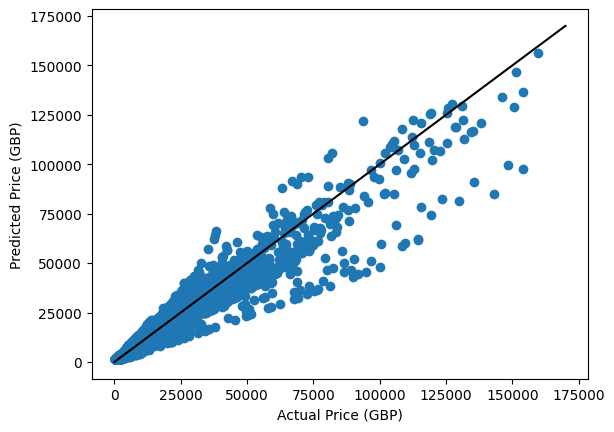

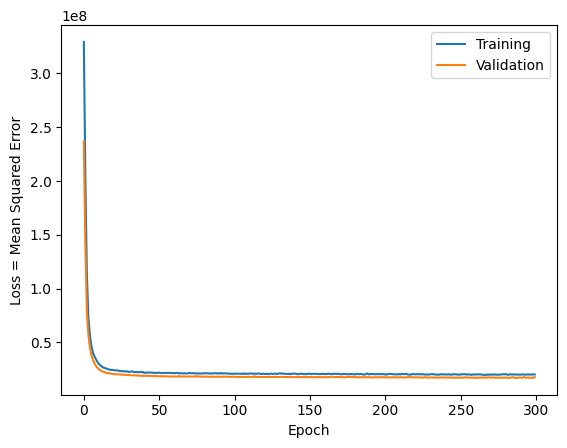

*** Hyper-parameters: Hidden layers : 2, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 19035917.290476363
Mean absolute_error = 2109.067469152832
R2 score = 0.9298538842934749




In [33]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

#### ANN with three hidden layers, default adam optimizer and 20% drop out

In [34]:
hidden_layers = 3
adam_optimizer_learning_rate = 'adam'
drop_out_rate = 0.2
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1125/1125 - 2s - loss: 230781152.0000 - 

Epoch 42/300
1125/1125 - 1s - loss: 21066112.0000 - mean_squared_error: 21066112.0000 - val_loss: 17810760.0000 - val_mean_squared_error: 17810760.0000 - 1s/epoch - 1ms/step
Epoch 43/300
1125/1125 - 1s - loss: 20915778.0000 - mean_squared_error: 20915778.0000 - val_loss: 17961558.0000 - val_mean_squared_error: 17961558.0000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 20888346.0000 - mean_squared_error: 20888346.0000 - val_loss: 17724132.0000 - val_mean_squared_error: 17724132.0000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 20818974.0000 - mean_squared_error: 20818974.0000 - val_loss: 17564226.0000 - val_mean_squared_error: 17564226.0000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 21196062.0000 - mean_squared_error: 21196062.0000 - val_loss: 17933872.0000 - val_mean_squared_error: 17933872.0000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 20788976.0000 - mean_squared_error: 20788976.0000 - val_loss: 18071108.0000 - val_mean_squared

[[60634.78  ]
 [35030.395 ]
 [16892.674 ]
 ...
 [38651.066 ]
 [ 1303.0305]
 [37519.316 ]]


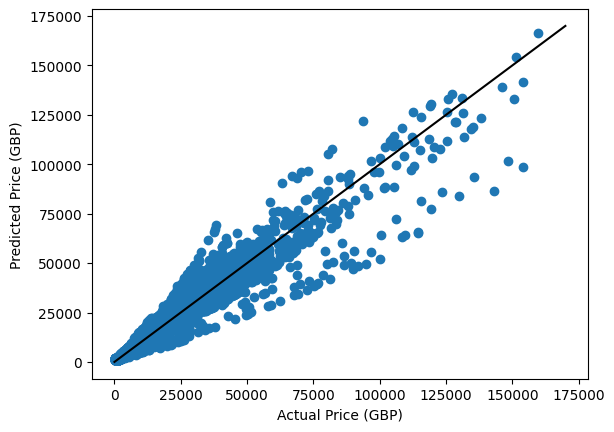

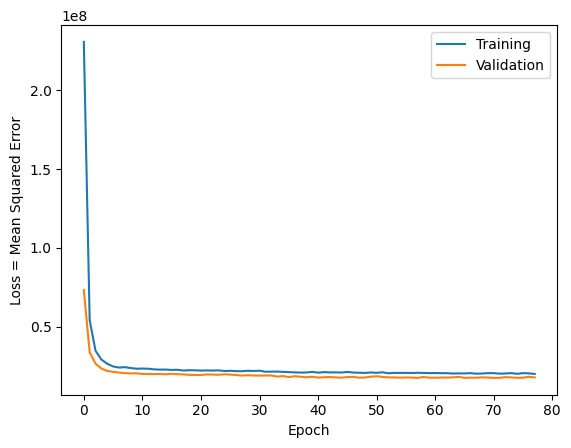

*** Hyper-parameters: Hidden layers : 3, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 18488033.65786526
Mean absolute_error = 2124.073058447266
R2 score = 0.9318727998046322




In [35]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

#### ANN with four hidden layers, default adam optimizer and 20% drop out

In [36]:
hidden_layers = 4
adam_optimizer_learning_rate = 'adam'
drop_out_rate = 0.2
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                384       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trai

Epoch 42/300
1125/1125 - 1s - loss: 14271467.0000 - mean_squared_error: 14271467.0000 - val_loss: 9799103.0000 - val_mean_squared_error: 9799103.0000 - 1s/epoch - 1ms/step
Epoch 43/300
1125/1125 - 1s - loss: 14239754.0000 - mean_squared_error: 14239754.0000 - val_loss: 12125664.0000 - val_mean_squared_error: 12125664.0000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 14144502.0000 - mean_squared_error: 14144502.0000 - val_loss: 9033362.0000 - val_mean_squared_error: 9033362.0000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 13721683.0000 - mean_squared_error: 13721683.0000 - val_loss: 9403332.0000 - val_mean_squared_error: 9403332.0000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 14009726.0000 - mean_squared_error: 14009726.0000 - val_loss: 12494762.0000 - val_mean_squared_error: 12494762.0000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 13937201.0000 - mean_squared_error: 13937201.0000 - val_loss: 9184922.0000 - val_mean_squared_error:

Epoch 90/300
1125/1125 - 2s - loss: 10278467.0000 - mean_squared_error: 10278467.0000 - val_loss: 8087462.0000 - val_mean_squared_error: 8087462.0000 - 2s/epoch - 1ms/step
Epoch 91/300
1125/1125 - 1s - loss: 9611940.0000 - mean_squared_error: 9611940.0000 - val_loss: 10003665.0000 - val_mean_squared_error: 10003665.0000 - 1s/epoch - 1ms/step
Epoch 92/300
1125/1125 - 1s - loss: 10112324.0000 - mean_squared_error: 10112324.0000 - val_loss: 7661380.5000 - val_mean_squared_error: 7661380.5000 - 1s/epoch - 1ms/step
Epoch 93/300
1125/1125 - 1s - loss: 9780380.0000 - mean_squared_error: 9780380.0000 - val_loss: 6936579.5000 - val_mean_squared_error: 6936579.5000 - 1s/epoch - 1ms/step
Epoch 94/300
1125/1125 - 1s - loss: 9917268.0000 - mean_squared_error: 9917268.0000 - val_loss: 9978393.0000 - val_mean_squared_error: 9978393.0000 - 1s/epoch - 1ms/step
Epoch 95/300
1125/1125 - 1s - loss: 9849038.0000 - mean_squared_error: 9849038.0000 - val_loss: 6867502.0000 - val_mean_squared_error: 6867502.0

[[64187.34  ]
 [32245.934 ]
 [18114.057 ]
 ...
 [38440.984 ]
 [ 1410.0074]
 [33933.094 ]]


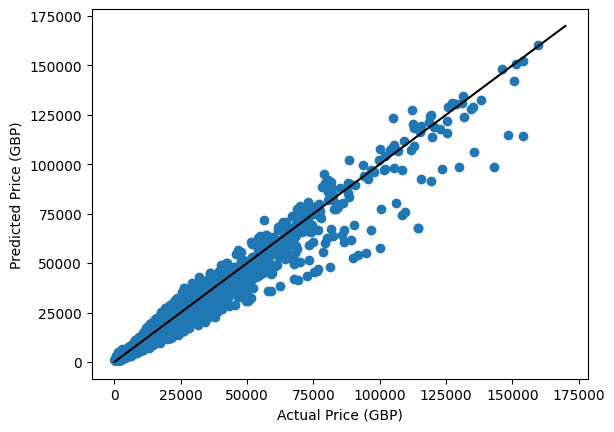

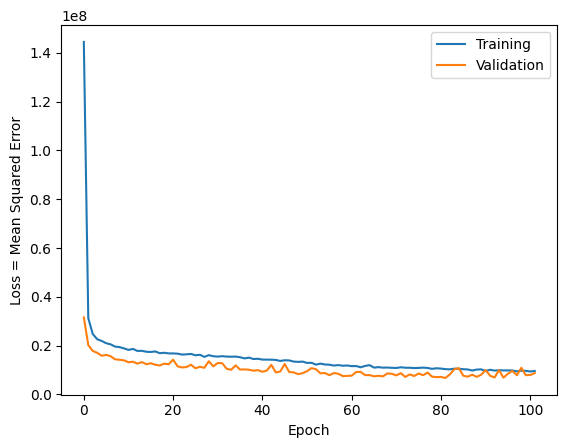

*** Hyper-parameters: Hidden layers : 4, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 9416055.173835343
Mean absolute_error = 1507.0814471740723
R2 score = 0.965302449803492




In [37]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

#### ANN with three hidden layers,  High adam optimizer(learning rate) of 0.01 and 20% drop out

In [38]:
adam_optimizer = Adam(learning_rate = 0.01)
hidden_layers = 3
adam_optimizer_learning_rate = adam_optimizer
drop_out_rate = 0.2
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1125/1125 - 2s - loss: 61810948.0000 - m

[[52835.59  ]
 [29203.26  ]
 [13629.942 ]
 ...
 [31056.264 ]
 [ 1741.7843]
 [31681.63  ]]


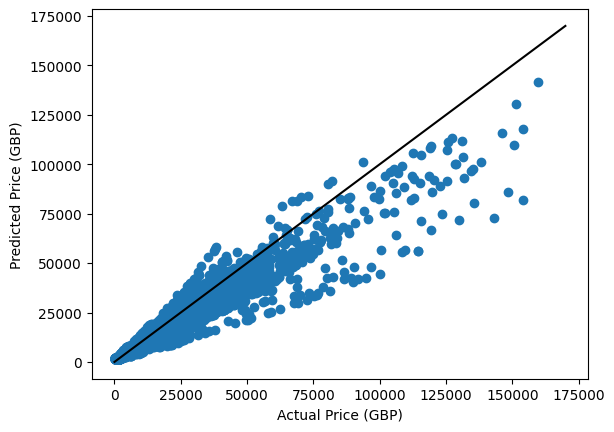

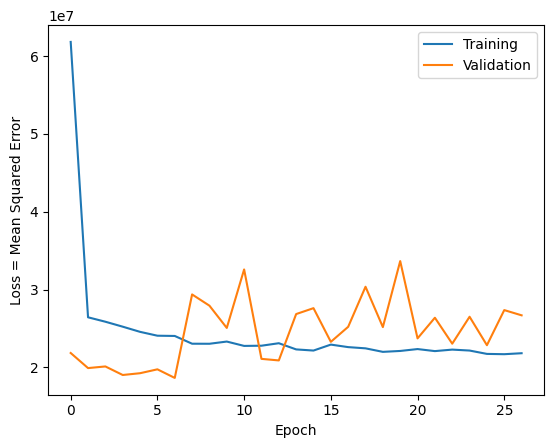

*** Hyper-parameters: Hidden layers : 3, Learning rate : 0.01, Drop out : 0.2 ***


Mean squared_error = 29068812.78695786
Mean absolute_error = 2725.8942712768553
R2 score = 0.8928833176730915




In [39]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

#### ANN with three hidden layers,  low adam optimizer(learning rate) of 0.0001 and 20% drop out

In [40]:
adam_optimizer = Adam(learning_rate = 0.0001)
hidden_layers = 3
adam_optimizer_learning_rate = adam_optimizer
drop_out_rate = 0.2
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                384       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1125/1125 - 2s - loss: 452909952.0000 - 

Epoch 42/300
1125/1125 - 1s - loss: 26962316.0000 - mean_squared_error: 26962316.0000 - val_loss: 22695184.0000 - val_mean_squared_error: 22695184.0000 - 1s/epoch - 1ms/step
Epoch 43/300
1125/1125 - 1s - loss: 26697098.0000 - mean_squared_error: 26697098.0000 - val_loss: 22562882.0000 - val_mean_squared_error: 22562882.0000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 26677520.0000 - mean_squared_error: 26677520.0000 - val_loss: 22421318.0000 - val_mean_squared_error: 22421318.0000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 26550804.0000 - mean_squared_error: 26550804.0000 - val_loss: 22306734.0000 - val_mean_squared_error: 22306734.0000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 25762788.0000 - mean_squared_error: 25762788.0000 - val_loss: 22085424.0000 - val_mean_squared_error: 22085424.0000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 25971844.0000 - mean_squared_error: 25971844.0000 - val_loss: 21983248.0000 - val_mean_squared

Epoch 90/300
1125/1125 - 1s - loss: 22694512.0000 - mean_squared_error: 22694512.0000 - val_loss: 19786052.0000 - val_mean_squared_error: 19786052.0000 - 1s/epoch - 1ms/step
Epoch 91/300
1125/1125 - 1s - loss: 23113792.0000 - mean_squared_error: 23113792.0000 - val_loss: 19752254.0000 - val_mean_squared_error: 19752254.0000 - 1s/epoch - 1ms/step
Epoch 92/300
1125/1125 - 1s - loss: 22788708.0000 - mean_squared_error: 22788708.0000 - val_loss: 19771692.0000 - val_mean_squared_error: 19771692.0000 - 1s/epoch - 1ms/step
Epoch 93/300
1125/1125 - 1s - loss: 22641518.0000 - mean_squared_error: 22641518.0000 - val_loss: 19702974.0000 - val_mean_squared_error: 19702974.0000 - 1s/epoch - 1ms/step
Epoch 94/300
1125/1125 - 1s - loss: 22971162.0000 - mean_squared_error: 22971162.0000 - val_loss: 19709076.0000 - val_mean_squared_error: 19709076.0000 - 1s/epoch - 1ms/step
Epoch 95/300
1125/1125 - 1s - loss: 22585234.0000 - mean_squared_error: 22585234.0000 - val_loss: 19661914.0000 - val_mean_squared

Epoch 137/300
1125/1125 - 1s - loss: 20808146.0000 - mean_squared_error: 20808146.0000 - val_loss: 17796568.0000 - val_mean_squared_error: 17796568.0000 - 1s/epoch - 1ms/step
Epoch 138/300
1125/1125 - 1s - loss: 20919670.0000 - mean_squared_error: 20919670.0000 - val_loss: 17715060.0000 - val_mean_squared_error: 17715060.0000 - 1s/epoch - 1ms/step
Epoch 139/300
1125/1125 - 1s - loss: 21008024.0000 - mean_squared_error: 21008024.0000 - val_loss: 17742472.0000 - val_mean_squared_error: 17742472.0000 - 1s/epoch - 1ms/step
Epoch 140/300
1125/1125 - 1s - loss: 20781418.0000 - mean_squared_error: 20781418.0000 - val_loss: 17690726.0000 - val_mean_squared_error: 17690726.0000 - 1s/epoch - 1ms/step
Epoch 141/300
1125/1125 - 1s - loss: 20975602.0000 - mean_squared_error: 20975602.0000 - val_loss: 17643996.0000 - val_mean_squared_error: 17643996.0000 - 1s/epoch - 1ms/step
Epoch 142/300
1125/1125 - 1s - loss: 20505770.0000 - mean_squared_error: 20505770.0000 - val_loss: 17671800.0000 - val_mean_s

Epoch 184/300
1125/1125 - 1s - loss: 20062728.0000 - mean_squared_error: 20062728.0000 - val_loss: 16505064.0000 - val_mean_squared_error: 16505064.0000 - 1s/epoch - 1ms/step
Epoch 185/300
1125/1125 - 1s - loss: 20098942.0000 - mean_squared_error: 20098942.0000 - val_loss: 16544588.0000 - val_mean_squared_error: 16544588.0000 - 1s/epoch - 1ms/step
Epoch 186/300
1125/1125 - 1s - loss: 20292768.0000 - mean_squared_error: 20292768.0000 - val_loss: 16537868.0000 - val_mean_squared_error: 16537868.0000 - 1s/epoch - 1ms/step
Epoch 187/300
1125/1125 - 1s - loss: 19738328.0000 - mean_squared_error: 19738328.0000 - val_loss: 16497925.0000 - val_mean_squared_error: 16497925.0000 - 1s/epoch - 1ms/step
Epoch 188/300
1125/1125 - 1s - loss: 19715430.0000 - mean_squared_error: 19715430.0000 - val_loss: 16443986.0000 - val_mean_squared_error: 16443986.0000 - 1s/epoch - 1ms/step
Epoch 189/300
1125/1125 - 1s - loss: 19706708.0000 - mean_squared_error: 19706708.0000 - val_loss: 16438275.0000 - val_mean_s

Epoch 231/300
1125/1125 - 1s - loss: 19089322.0000 - mean_squared_error: 19089322.0000 - val_loss: 15828819.0000 - val_mean_squared_error: 15828819.0000 - 1s/epoch - 1ms/step
Epoch 232/300
1125/1125 - 1s - loss: 19256930.0000 - mean_squared_error: 19256930.0000 - val_loss: 15701595.0000 - val_mean_squared_error: 15701595.0000 - 1s/epoch - 1ms/step
Epoch 233/300
1125/1125 - 1s - loss: 19210416.0000 - mean_squared_error: 19210416.0000 - val_loss: 15796094.0000 - val_mean_squared_error: 15796094.0000 - 1s/epoch - 1ms/step
Epoch 234/300
1125/1125 - 1s - loss: 19109918.0000 - mean_squared_error: 19109918.0000 - val_loss: 15564256.0000 - val_mean_squared_error: 15564256.0000 - 1s/epoch - 1ms/step
Epoch 235/300
1125/1125 - 1s - loss: 19042182.0000 - mean_squared_error: 19042182.0000 - val_loss: 15628741.0000 - val_mean_squared_error: 15628741.0000 - 1s/epoch - 1ms/step
Epoch 236/300
1125/1125 - 1s - loss: 19012178.0000 - mean_squared_error: 19012178.0000 - val_loss: 15582079.0000 - val_mean_s

Epoch 278/300
1125/1125 - 1s - loss: 18502890.0000 - mean_squared_error: 18502890.0000 - val_loss: 14908400.0000 - val_mean_squared_error: 14908400.0000 - 1s/epoch - 1ms/step
Epoch 279/300
1125/1125 - 1s - loss: 18529766.0000 - mean_squared_error: 18529766.0000 - val_loss: 14990817.0000 - val_mean_squared_error: 14990817.0000 - 1s/epoch - 1ms/step
Epoch 280/300
1125/1125 - 1s - loss: 18689258.0000 - mean_squared_error: 18689258.0000 - val_loss: 15001743.0000 - val_mean_squared_error: 15001743.0000 - 1s/epoch - 1ms/step
Epoch 281/300
1125/1125 - 1s - loss: 18481858.0000 - mean_squared_error: 18481858.0000 - val_loss: 14960916.0000 - val_mean_squared_error: 14960916.0000 - 1s/epoch - 1ms/step
Epoch 282/300
1125/1125 - 1s - loss: 18717504.0000 - mean_squared_error: 18717504.0000 - val_loss: 14912256.0000 - val_mean_squared_error: 14912256.0000 - 1s/epoch - 1ms/step
Epoch 283/300
1125/1125 - 1s - loss: 18348928.0000 - mean_squared_error: 18348928.0000 - val_loss: 14899079.0000 - val_mean_s

[[61375.51 ]
 [37511.04 ]
 [16466.568]
 ...
 [38832.68 ]
 [ 1735.586]
 [36344.14 ]]


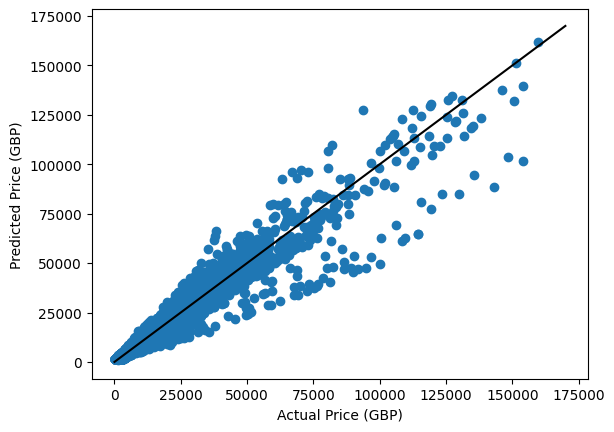

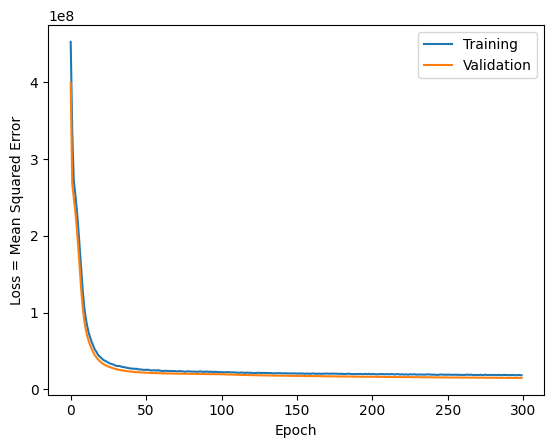

*** Hyper-parameters: Hidden layers : 3, Learning rate : 0.0001, Drop out : 0.2 ***


Mean squared_error = 15900219.214766605
Mean absolute_error = 1877.0980734375
R2 score = 0.9414087275239353




In [41]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

#### ANN with three hidden layers, default adam optimizer and 10% drop out

In [42]:
hidden_layers = 3
adam_optimizer_learning_rate = 'adam'
drop_out_rate = 0.1
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                384       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
1125/1125 - 2s - loss: 217849488.0000 - 

Epoch 42/300
1125/1125 - 1s - loss: 12566098.0000 - mean_squared_error: 12566098.0000 - val_loss: 10187335.0000 - val_mean_squared_error: 10187335.0000 - 1s/epoch - 1ms/step
Epoch 43/300
1125/1125 - 1s - loss: 12248708.0000 - mean_squared_error: 12248708.0000 - val_loss: 10478501.0000 - val_mean_squared_error: 10478501.0000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 12553131.0000 - mean_squared_error: 12553131.0000 - val_loss: 10056104.0000 - val_mean_squared_error: 10056104.0000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 12369992.0000 - mean_squared_error: 12369992.0000 - val_loss: 10657943.0000 - val_mean_squared_error: 10657943.0000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 12100029.0000 - mean_squared_error: 12100029.0000 - val_loss: 10758000.0000 - val_mean_squared_error: 10758000.0000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 12191146.0000 - mean_squared_error: 12191146.0000 - val_loss: 9940267.0000 - val_mean_squared_

Epoch 90/300
1125/1125 - 1s - loss: 9445730.0000 - mean_squared_error: 9445730.0000 - val_loss: 7608045.0000 - val_mean_squared_error: 7608045.0000 - 1s/epoch - 1ms/step
Epoch 91/300
1125/1125 - 1s - loss: 9521812.0000 - mean_squared_error: 9521812.0000 - val_loss: 7645351.5000 - val_mean_squared_error: 7645351.5000 - 1s/epoch - 1ms/step
Epoch 92/300
1125/1125 - 1s - loss: 9456536.0000 - mean_squared_error: 9456536.0000 - val_loss: 7635390.0000 - val_mean_squared_error: 7635390.0000 - 1s/epoch - 1ms/step
Epoch 93/300
1125/1125 - 1s - loss: 9474796.0000 - mean_squared_error: 9474796.0000 - val_loss: 7877749.0000 - val_mean_squared_error: 7877749.0000 - 1s/epoch - 1ms/step
Epoch 94/300
1125/1125 - 1s - loss: 9535202.0000 - mean_squared_error: 9535202.0000 - val_loss: 7676589.5000 - val_mean_squared_error: 7676589.5000 - 1s/epoch - 1ms/step
Epoch 95/300
1125/1125 - 1s - loss: 9355790.0000 - mean_squared_error: 9355790.0000 - val_loss: 7991915.0000 - val_mean_squared_error: 7991915.0000 - 

Epoch 138/300
1125/1125 - 1s - loss: 8614379.0000 - mean_squared_error: 8614379.0000 - val_loss: 6823897.0000 - val_mean_squared_error: 6823897.0000 - 1s/epoch - 1ms/step
Epoch 139/300
1125/1125 - 1s - loss: 8402585.0000 - mean_squared_error: 8402585.0000 - val_loss: 6780927.0000 - val_mean_squared_error: 6780927.0000 - 1s/epoch - 1ms/step
Epoch 140/300
1125/1125 - 1s - loss: 8449854.0000 - mean_squared_error: 8449854.0000 - val_loss: 6812895.0000 - val_mean_squared_error: 6812895.0000 - 1s/epoch - 1ms/step
Epoch 141/300
1125/1125 - 1s - loss: 8487424.0000 - mean_squared_error: 8487424.0000 - val_loss: 6744917.5000 - val_mean_squared_error: 6744917.5000 - 1s/epoch - 1ms/step
Epoch 142/300
1125/1125 - 1s - loss: 8418519.0000 - mean_squared_error: 8418519.0000 - val_loss: 6890551.5000 - val_mean_squared_error: 6890551.5000 - 1s/epoch - 1ms/step
Epoch 143/300
1125/1125 - 1s - loss: 8687671.0000 - mean_squared_error: 8687671.0000 - val_loss: 6761573.5000 - val_mean_squared_error: 6761573.5

Epoch 186/300
1125/1125 - 1s - loss: 7861228.0000 - mean_squared_error: 7861228.0000 - val_loss: 6813906.0000 - val_mean_squared_error: 6813906.0000 - 1s/epoch - 1ms/step
Epoch 187/300
1125/1125 - 1s - loss: 7897439.5000 - mean_squared_error: 7897439.5000 - val_loss: 6392381.5000 - val_mean_squared_error: 6392381.5000 - 1s/epoch - 1ms/step
Epoch 188/300
1125/1125 - 1s - loss: 7909076.5000 - mean_squared_error: 7909076.5000 - val_loss: 6593706.0000 - val_mean_squared_error: 6593706.0000 - 1s/epoch - 1ms/step
Epoch 189/300
1125/1125 - 1s - loss: 7833463.5000 - mean_squared_error: 7833463.5000 - val_loss: 6612792.5000 - val_mean_squared_error: 6612792.5000 - 1s/epoch - 1ms/step
Epoch 190/300
1125/1125 - 1s - loss: 7829753.5000 - mean_squared_error: 7829753.5000 - val_loss: 6514670.5000 - val_mean_squared_error: 6514670.5000 - 1s/epoch - 1ms/step
Epoch 191/300
1125/1125 - 1s - loss: 7763217.0000 - mean_squared_error: 7763217.0000 - val_loss: 6177075.0000 - val_mean_squared_error: 6177075.0

Epoch 234/300
1125/1125 - 1s - loss: 7545768.0000 - mean_squared_error: 7545768.0000 - val_loss: 6236476.0000 - val_mean_squared_error: 6236476.0000 - 1s/epoch - 1ms/step
Epoch 235/300
1125/1125 - 1s - loss: 7474881.5000 - mean_squared_error: 7474881.5000 - val_loss: 6276678.5000 - val_mean_squared_error: 6276678.5000 - 1s/epoch - 1ms/step
Epoch 236/300
1125/1125 - 1s - loss: 7415984.0000 - mean_squared_error: 7415984.0000 - val_loss: 6115148.5000 - val_mean_squared_error: 6115148.5000 - 1s/epoch - 1ms/step
Epoch 237/300
1125/1125 - 1s - loss: 7496216.0000 - mean_squared_error: 7496216.0000 - val_loss: 6220813.0000 - val_mean_squared_error: 6220813.0000 - 1s/epoch - 1ms/step
Epoch 238/300
1125/1125 - 1s - loss: 7433584.5000 - mean_squared_error: 7433584.5000 - val_loss: 6506972.5000 - val_mean_squared_error: 6506972.5000 - 1s/epoch - 1ms/step
Epoch 239/300
1125/1125 - 1s - loss: 7528628.0000 - mean_squared_error: 7528628.0000 - val_loss: 6190931.5000 - val_mean_squared_error: 6190931.5

[[69314.64  ]
 [35267.586 ]
 [17572.156 ]
 ...
 [38826.383 ]
 [ 2177.0554]
 [33723.824 ]]


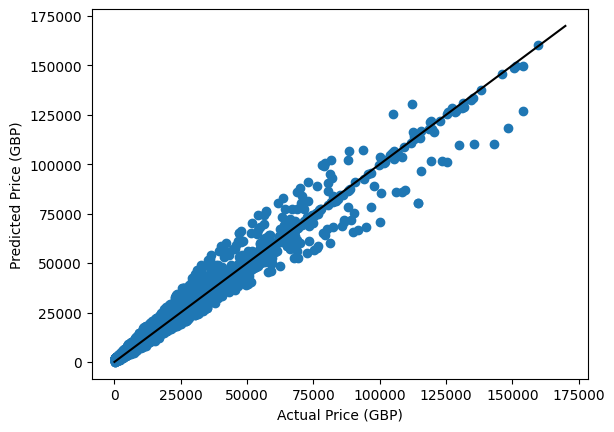

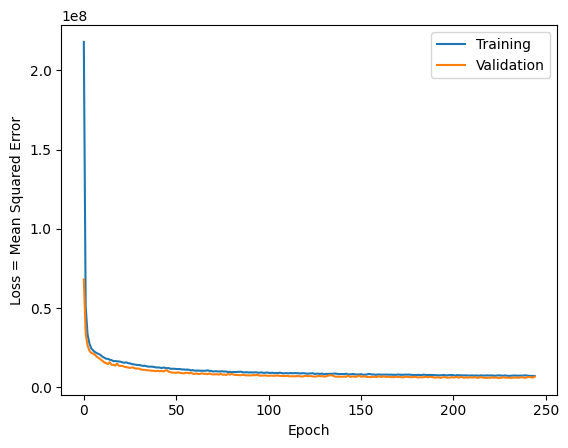

*** Hyper-parameters: Hidden layers : 3, Learning rate : default, Drop out : 0.1 ***


Mean squared_error = 7206262.611715733
Mean absolute_error = 1535.2679322704316
R2 score = 0.9734453915059867




In [43]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

In [44]:
hidden_layers = 4
adam_optimizer_learning_rate = 'adam'
drop_out_rate = 0.1
y_pred, history, metrics = ann_model(hidden_layers, adam_optimizer_learning_rate, drop_out_rate)
ann_metrics.append(metrics)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                384       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trai

Epoch 42/300
1125/1125 - 1s - loss: 9313577.0000 - mean_squared_error: 9313577.0000 - val_loss: 7320135.0000 - val_mean_squared_error: 7320135.0000 - 1s/epoch - 1ms/step
Epoch 43/300
1125/1125 - 1s - loss: 9154106.0000 - mean_squared_error: 9154106.0000 - val_loss: 7839935.5000 - val_mean_squared_error: 7839935.5000 - 1s/epoch - 1ms/step
Epoch 44/300
1125/1125 - 1s - loss: 9287563.0000 - mean_squared_error: 9287563.0000 - val_loss: 6822769.5000 - val_mean_squared_error: 6822769.5000 - 1s/epoch - 1ms/step
Epoch 45/300
1125/1125 - 1s - loss: 9085543.0000 - mean_squared_error: 9085543.0000 - val_loss: 6926906.5000 - val_mean_squared_error: 6926906.5000 - 1s/epoch - 1ms/step
Epoch 46/300
1125/1125 - 1s - loss: 9295148.0000 - mean_squared_error: 9295148.0000 - val_loss: 7193115.5000 - val_mean_squared_error: 7193115.5000 - 1s/epoch - 1ms/step
Epoch 47/300
1125/1125 - 1s - loss: 8902043.0000 - mean_squared_error: 8902043.0000 - val_loss: 7371931.0000 - val_mean_squared_error: 7371931.0000 - 

Epoch 91/300
1125/1125 - 1s - loss: 7949740.0000 - mean_squared_error: 7949740.0000 - val_loss: 6470028.0000 - val_mean_squared_error: 6470028.0000 - 1s/epoch - 1ms/step
Epoch 92/300
1125/1125 - 1s - loss: 7977114.0000 - mean_squared_error: 7977114.0000 - val_loss: 6914508.5000 - val_mean_squared_error: 6914508.5000 - 1s/epoch - 1ms/step
Epoch 93/300
1125/1125 - 1s - loss: 7859220.0000 - mean_squared_error: 7859220.0000 - val_loss: 6505436.0000 - val_mean_squared_error: 6505436.0000 - 1s/epoch - 1ms/step
Epoch 94/300
1125/1125 - 1s - loss: 7920233.0000 - mean_squared_error: 7920233.0000 - val_loss: 7348520.5000 - val_mean_squared_error: 7348520.5000 - 1s/epoch - 1ms/step
Epoch 95/300
1125/1125 - 1s - loss: 7732273.0000 - mean_squared_error: 7732273.0000 - val_loss: 7562564.5000 - val_mean_squared_error: 7562564.5000 - 1s/epoch - 1ms/step
Epoch 96/300
1125/1125 - 1s - loss: 7902069.5000 - mean_squared_error: 7902069.5000 - val_loss: 6585018.0000 - val_mean_squared_error: 6585018.0000 - 

[[71315.7    ]
 [36798.69   ]
 [18452.627  ]
 ...
 [39822.98   ]
 [  486.80856]
 [34251.586  ]]


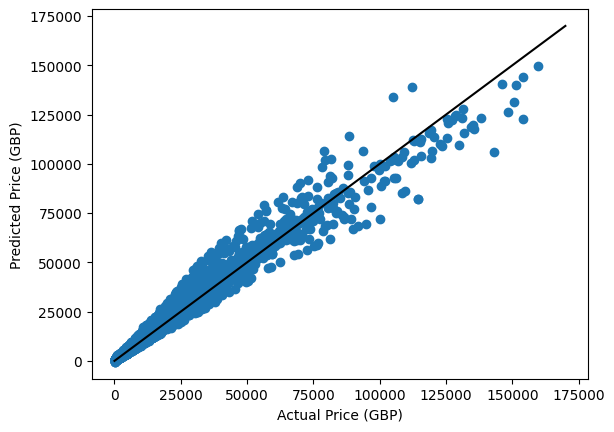

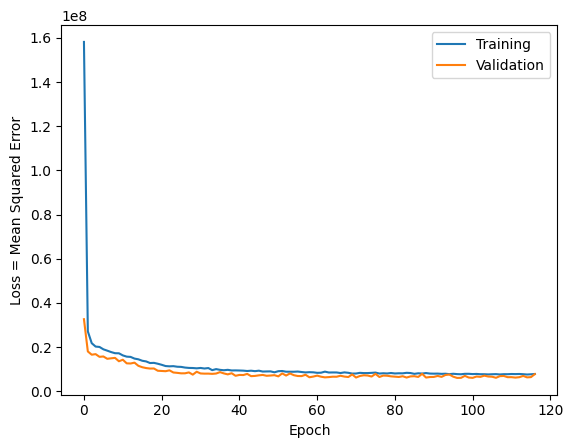

*** Hyper-parameters: Hidden layers : 4, Learning rate : default, Drop out : 0.1 ***


Mean squared_error = 8239914.431623366
Mean absolute_error = 1604.5349350973129
R2 score = 0.9696364518550578




In [45]:
print(y_pred)
plot_graphs(y_pred, history)
print_metrics(metrics)

In [46]:
for m in ann_metrics:
    print_metrics(m)

*** Hyper-parameters: Hidden layers : 2, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 19035917.290476363
Mean absolute_error = 2109.067469152832
R2 score = 0.9298538842934749


*** Hyper-parameters: Hidden layers : 3, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 18488033.65786526
Mean absolute_error = 2124.073058447266
R2 score = 0.9318727998046322


*** Hyper-parameters: Hidden layers : 4, Learning rate : default, Drop out : 0.2 ***


Mean squared_error = 9416055.173835343
Mean absolute_error = 1507.0814471740723
R2 score = 0.965302449803492


*** Hyper-parameters: Hidden layers : 3, Learning rate : 0.01, Drop out : 0.2 ***


Mean squared_error = 29068812.78695786
Mean absolute_error = 2725.8942712768553
R2 score = 0.8928833176730915


*** Hyper-parameters: Hidden layers : 3, Learning rate : 0.0001, Drop out : 0.2 ***


Mean squared_error = 15900219.214766605
Mean absolute_error = 1877.0980734375
R2 score = 0.9414087275239353


*** Hyper-par

#### k-Means clustering algorithm

In [50]:
def scale_data(features):
    x = df[features]

    scale = StandardScaler()
    scale.fit(x)
    x_scaled = scale.transform(x)
    return (x_scaled)

In [51]:
def number_of_clusters(x_scaled):
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        kmeans.fit(x_scaled)
        inertia.append(kmeans.inertia_)

    plt.plot(k_range, inertia, 'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()

In [52]:
def kmeans_algorithm(x_scaled, feature, clusters):
    kmeans_final = KMeans(n_clusters = clusters, random_state = 42)
    kmeans_final.fit(x_scaled)

    cluster_labels_pred = kmeans_final.predict(x_scaled)

    db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
    s_score = silhouette_score(x_scaled, cluster_labels_pred)
    c_score = calinski_harabasz_score(x_scaled, cluster_labels_pred)

    print('Internal evaluation metrics')
    print('********************************')
    print(f"Davies Bouldin Index for {feature} = %.4f" % (db_score, ))
    print(f"Silhouette Coefficient for {feature} = %.4f" % (s_score, ))
    print(f"Calinski harabasz Score for {feature} = %.4f" % (c_score, ))

    return(cluster_labels_pred)

In [53]:
def plot_clusters(model, feature, cluster_labels_pred, k = ''):
    sns.scatterplot(data = df, x = feature, y = 'Price', hue = cluster_labels_pred)
    plt.legend()
    plt.title(f'{model} {k} Cluster Labels for {feature} and Price') 
    plt.xlabel(feature)
    plt.ylabel('Price (GBP)')
    plt.show()

#### Engine size and Price

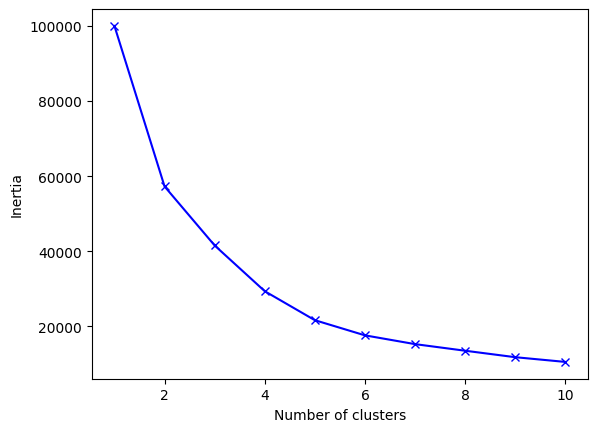

In [54]:
feature_names = ['Engine size', 'Price']
x_scaled = scale_data(feature_names)
number_of_clusters(x_scaled)

Internal evaluation metrics
********************************
Davies Bouldin Index for Engine size = 0.8982
Silhouette Coefficient for Engine size = 0.4727
Calinski harabasz Score for Engine size = 35151.8809


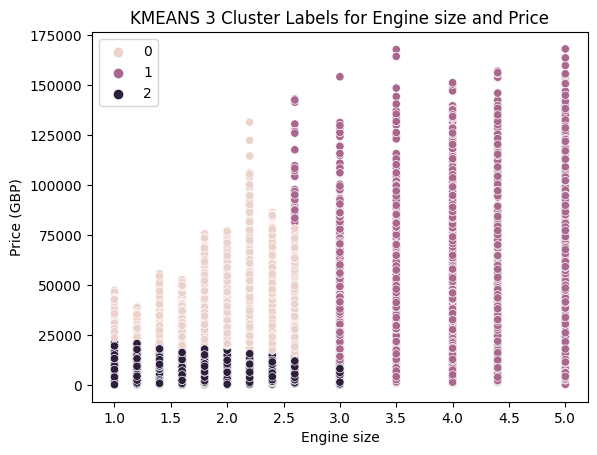

In [55]:
#kmeans with 3 clusters for Engine size and Price
feature = 'Engine size'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 3)
plot_clusters('KMEANS', feature, cluster_labels_pred, '3')

Internal evaluation metrics
********************************
Davies Bouldin Index for Engine size = 0.7636
Silhouette Coefficient for Engine size = 0.4929
Calinski harabasz Score for Engine size = 40044.6125


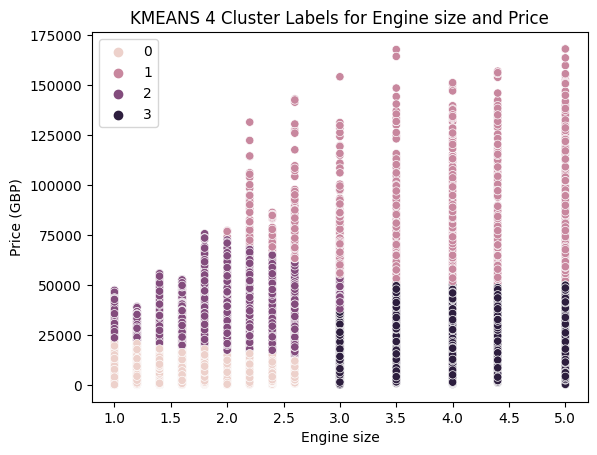

In [56]:
#kmeans with 4 clusters for Engine size and Price
feature = 'Engine size'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 4)
plot_clusters('KMEANS', feature, cluster_labels_pred, '4')

#### Year of manufacture and Price

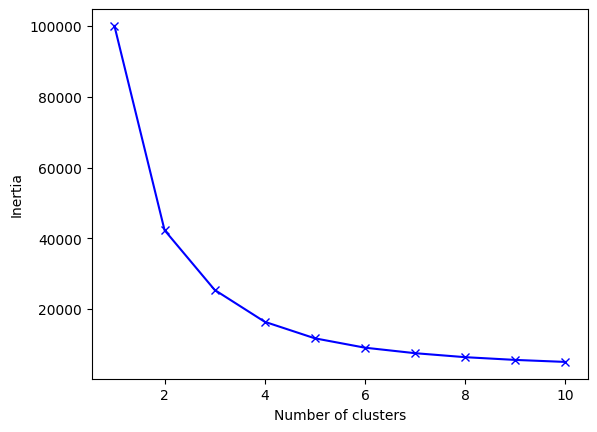

In [57]:
feature_names = ['Year of manufacture', 'Price']
x_scaled = scale_data(feature_names)
number_of_clusters(x_scaled)

Internal evaluation metrics
********************************
Davies Bouldin Index for Year of manufacture = 0.6866
Silhouette Coefficient for Year of manufacture = 0.5139
Calinski harabasz Score for Year of manufacture = 73347.4383


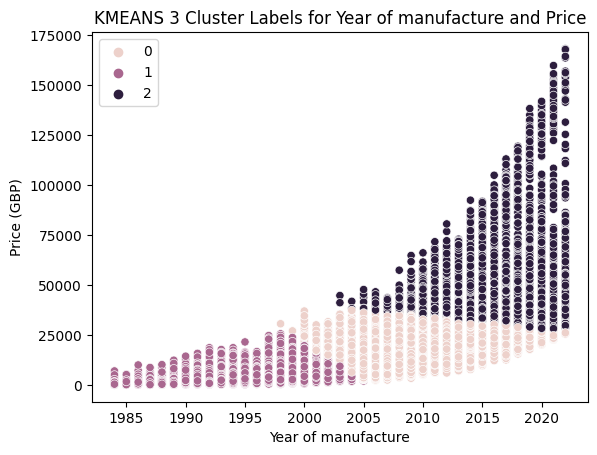

In [58]:
#kmeans with 3 clusters for Year of manufacture and Price
feature = 'Year of manufacture'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 3)
plot_clusters('KMEANS', feature, cluster_labels_pred, '3')

Internal evaluation metrics
********************************
Davies Bouldin Index for Year of manufacture = 0.6433
Silhouette Coefficient for Year of manufacture = 0.4981
Calinski harabasz Score for Year of manufacture = 84897.0811


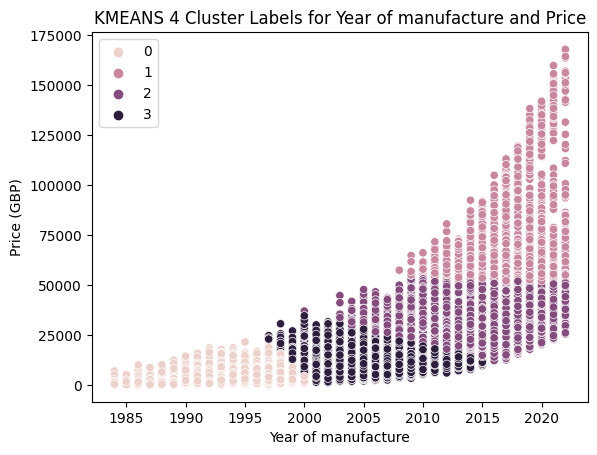

In [59]:
#kmeans with 4 clusters for Year of manufacture and Price
feature = 'Year of manufacture'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 4)
plot_clusters('KMEANS', feature, cluster_labels_pred, '4')

#### Mileage and Price

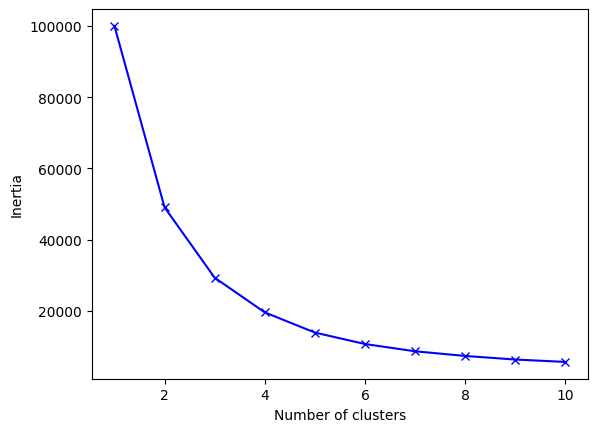

In [60]:
feature_names = ['Mileage', 'Price']
x_scaled = scale_data(feature_names)
number_of_clusters(x_scaled)

Internal evaluation metrics
********************************
Davies Bouldin Index for Mileage = 0.6870
Silhouette Coefficient for Mileage = 0.4786
Calinski harabasz Score for Mileage = 60163.7525


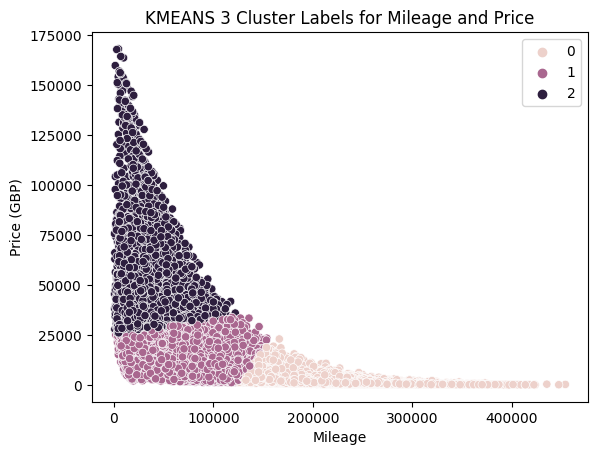

In [61]:
#kmeans with 3 clusters for Mileage and Price
feature = 'Mileage'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 3)
plot_clusters('KMEANS', feature, cluster_labels_pred, '3')

Internal evaluation metrics
********************************
Davies Bouldin Index for Mileage = 0.6577
Silhouette Coefficient for Mileage = 0.4703
Calinski harabasz Score for Mileage = 68215.2609


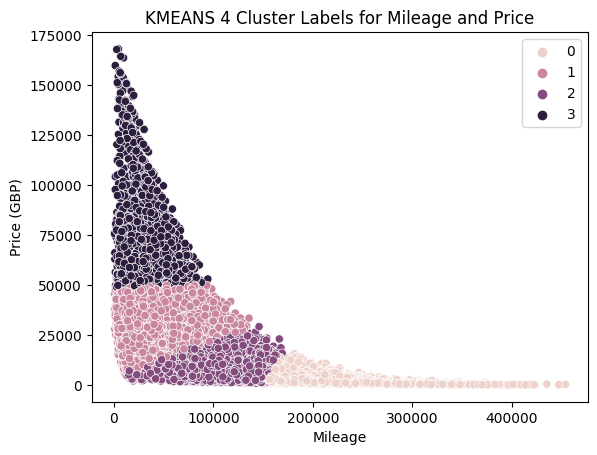

In [62]:
#kmeans with 4 clusters for Mileage and Price
feature = 'Mileage'
cluster_labels_pred = kmeans_algorithm(x_scaled, feature, 4)
plot_clusters('KMEANS', feature, cluster_labels_pred, '4')

In [63]:
def dbscan_clustering(x_scaled, feature):

    dbscan = DBSCAN(eps=0.2, min_samples=3)
    dbscan_labels_pred = dbscan.fit_predict(x_scaled)

    db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
    s_score = silhouette_score(x_scaled, dbscan_labels_pred)
    c_score = calinski_harabasz_score(x_scaled, dbscan_labels_pred)

    print(f"DBSCAN Davies Bouldin Index for {feature} = %.4f" % (db_score, ))
    print(f"DBSCAN Silhouette Coefficient for {feature} =  %.4f" % (s_score, ))
    print(f"DBSCAN Calinski Harabasz Score for {feature} =  %.4f" % (c_score, ))
    
    return (dbscan_labels_pred)


****** DBSCAN algorithm for Engine size and Price ******

DBSCAN Davies Bouldin Index for Engine size = 2.6414
DBSCAN Silhouette Coefficient for Engine size =  0.0608
DBSCAN Calinski Harabasz Score for Engine size =  2954.6646


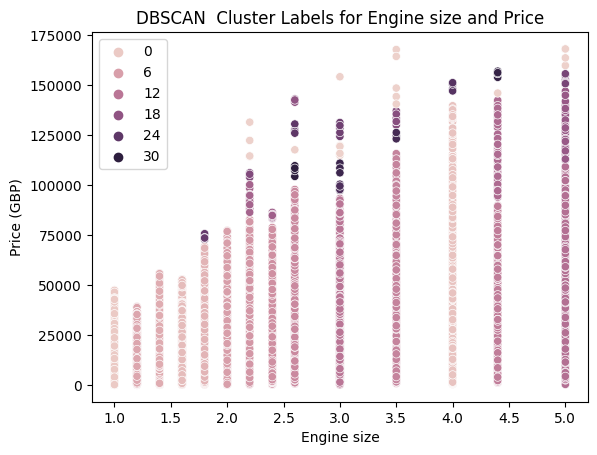


****** DBSCAN algorithm for Year of manufacture and Price ******

DBSCAN Davies Bouldin Index for Year of manufacture = 1.4952
DBSCAN Silhouette Coefficient for Year of manufacture =  0.6763
DBSCAN Calinski Harabasz Score for Year of manufacture =  96.7480


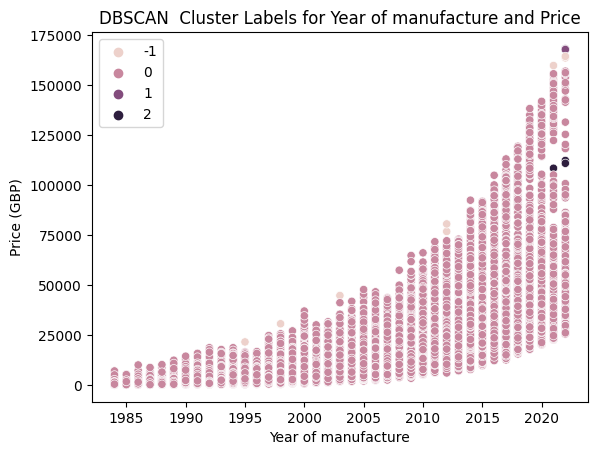


****** DBSCAN algorithm for Mileage and Price ******

DBSCAN Davies Bouldin Index for Mileage = 0.1570
DBSCAN Silhouette Coefficient for Mileage =  0.8178
DBSCAN Calinski Harabasz Score for Mileage =  111.2021


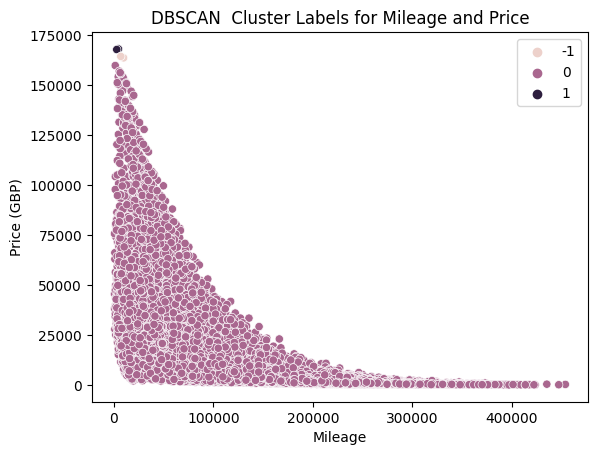

In [64]:
for feature in num_features:
    print(f'\n****** DBSCAN algorithm for {feature} and Price ******\n')
    feature_names = [feature, 'Price']
    x_scaled = scale_data(feature_names)
    dbscan_labels_pred = dbscan_clustering(x_scaled, feature)
    plot_clusters('DBSCAN', feature, dbscan_labels_pred)